In [760]:
print('happy ending')

happy ending


In [761]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df= dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list )

In [762]:
top_country=df['job_country'].value_counts().head(6).index

In [763]:
top_country

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [764]:
df_job_country_salary=df.pivot_table(values='salary_year_avg',index='job_country', columns='job_title_short', aggfunc='median')

In [765]:
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [766]:
df_job_country_salary= df_job_country_salary.loc[top_country]

In [767]:
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [768]:
job_titles=['Data Analyst', 'Data Engineer', 'Data Scientist']

In [769]:
df_job_country_salary=df_job_country_salary[job_titles]


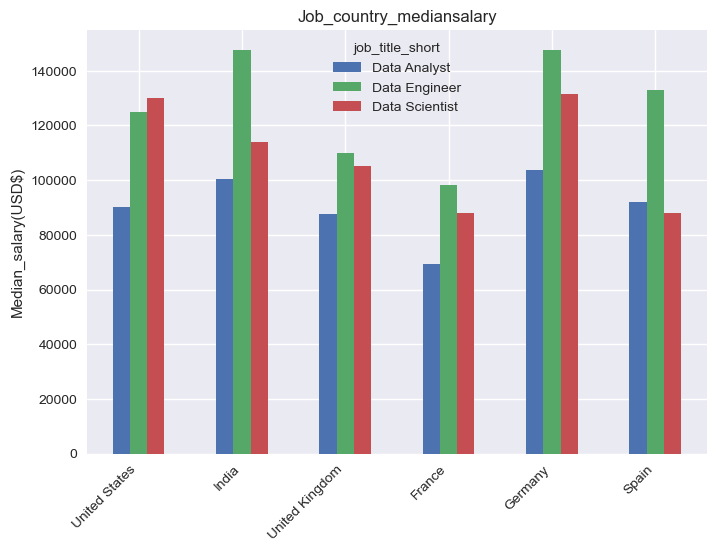

In [770]:
df_job_country_salary.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Median_salary(USD$)')
plt.title('Job_country_mediansalary')
plt.xticks(rotation=45, ha='right')
plt.show()


In [771]:
df.index.name='job_index'

In [772]:
df.index.dtype

dtype('int64')

In [773]:
df_usa=df[df['job_country']=='United States']

In [774]:
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"


In [775]:
df_usa.reset_index(inplace=True)


In [776]:
df_usa

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
206288,785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
206289,785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
206290,785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [777]:
df_usa.set_index('job_index', inplace=True)

In [778]:
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"


In [779]:
pivot_median=df.pivot_table(values='salary_year_avg', index='job_title_short', columns='job_country', aggfunc=['median', 'mean','std'])

In [780]:
pivot_median

median                                          \
job_country                  Albania  Algeria  Argentina   Armenia Australia   
job_title_short                                                                
Business Analyst                 NaN      NaN   71100.00       NaN   70000.0   
Cloud Engineer                   NaN      NaN  197500.00       NaN  110000.0   
Data Analyst                49950.00  44100.0   92771.75  100500.0  109500.0   
Data Engineer                    NaN  45000.0   96773.00   48750.0  106712.5   
Data Scientist              69981.25      NaN   71000.00       NaN  139216.0   
Machine Learning Engineer        NaN      NaN  101029.00   87021.0  101029.0   
Senior Data Analyst              NaN      NaN        NaN       NaN   50640.0   
Senior Data Engineer             NaN      NaN  147500.00       NaN  147500.0   
Senior Data Scientist      157500.00      NaN        NaN       NaN  157500.0   
Software Engineer                NaN      NaN  174500.00       NaN  118350.0   

                                                                      \
job_country                  Austria Azerbaijan   Bahamas Bangladesh   
job_title_short                                                        
Business Analyst                 NaN        NaN       NaN    16500.0   
Cloud Engineer                   NaN        NaN       NaN        NaN   
Data Analyst                80850.00        NaN       NaN        NaN   
Data Engineer              147500.00        NaN  211000.0    97444.0   
Data Scientist              71249.75        NaN       NaN        NaN   
Machine Learning Engineer   89100.00        NaN  228750.0    69000.0   
Senior Data Analyst         89100.00        NaN       NaN        NaN   
Senior Data Engineer       147500.00        NaN  173500.0        NaN   
Senior Data Scientist       80850.00        NaN       NaN        NaN   
Software Engineer                NaN    72000.0  173500.0        NaN   

                                     ...           std                \
job_country                 Belarus  ...      Thailand       Tunisia   
job_title_short                      ...                               
Business Analyst                NaN  ...   7001.976864           NaN   
Cloud Engineer                  NaN  ...           NaN           NaN   
Data Analyst               400000.0  ...  31189.734325           NaN   
Data Engineer                   NaN  ...  33688.057579  35869.405689   
Data Scientist                  NaN  ...  55364.003262           NaN   
Machine Learning Engineer       NaN  ...  46828.969463           NaN   
Senior Data Analyst             NaN  ...  14283.535837           NaN   
Senior Data Engineer            NaN  ...  54340.207336           NaN   
Senior Data Scientist           NaN  ...   7500.000000           NaN   
Software Engineer               NaN  ...  25707.722737           NaN   

                                                                           \
job_country                      Turkey U.S. Virgin Islands       Ukraine   
job_title_short                                                             
Business Analyst                    NaN                 NaN           NaN   
Cloud Engineer                      NaN                 NaN           NaN   
Data Analyst               48721.089939                 NaN  19841.347460   
Data Engineer              29348.030791                 NaN  30924.985265   
Data Scientist             15200.552328        36680.810721  50425.006972   
Machine Learning Engineer           NaN                 NaN  24051.254013   
Senior Data Analyst                 NaN         7071.067812           NaN   
Senior Data Engineer                NaN                 NaN      0.000000   
Senior Data Scientist      16495.386992                 NaN           NaN   
Software Engineer          25035.241827                 NaN           NaN   

                                                                             \
job_country               United A

In [781]:
pivot_median = pivot_median.loc[:, (slice(None), ['India', 'United States'])]

In [782]:
pivot_median

median                         mean  \
job_country                   India United States          India   
job_title_short                                                    
Business Analyst            64800.0       90000.0   82255.125000   
Cloud Engineer                  NaN      116100.0            NaN   
Data Analyst               100500.0       90000.0   99149.925532   
Data Engineer              147500.0      125000.0  123312.390533   
Data Scientist             114008.0      130000.0  118203.690217   
Machine Learning Engineer   79200.0      150000.0  111372.570175   
Senior Data Analyst        111175.0      110000.0  105740.592593   
Senior Data Engineer       147500.0      150000.0  132148.631579   
Senior Data Scientist      149653.0      155000.0  126035.787879   
Software Engineer           79200.0      130000.0   78420.377778   

                                                   std                
job_country                United States         India United States  
job_title_short                                                       
Business Analyst            96175.447397  37341.953753  32570.729242  
Cloud Engineer             120090.900000           NaN  45564.891468  
Data Analyst                94553.964924  64297.459680  33248.650655  
Data Engineer              134226.676753  33914.612191  42785.226304  
Data Scientist             139946.707204  41258.733259  52791.742973  
Machine Learning Engineer  154240.382812  48874.295220  55573.192498  
Senior Data Analyst        115729.129954  26365.900386  34769.663226  
Senior Data Engineer       151448.023186  35316.272354  36116.363829  
Senior Data Scientist      159330.432029  39929.904277  48880.807732  
Software Engineer          137964.929588  25885.903675  54015.437433

In [783]:
ind_jobs=df[df['job_country']=="India"].copy()

In [784]:
ind_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"[powershell, python, sql, mysql, sql server, d...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"[python, sql, aws, pyspark, docker, jira]","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"[excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"[c#, sql]","{'programming': ['c#', 'sql']}"


In [785]:
ind_jobs['posted_month']=ind_jobs.job_posted_date.dt.strftime('%B')

In [786]:
ind_job_pivot= ind_jobs.pivot_table(index="posted_month", columns='job_title_short', aggfunc='size')

In [787]:
ind_job_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
posted_month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [788]:
ind_job_pivot.reset_index(inplace=True)

In [789]:
ind_job_pivot

job_title_short,posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,170,32,418,1566,946,54,86,375,194,169
1,August,189,25,618,1407,1157,47,126,343,235,148
2,December,186,27,648,1464,1206,94,77,343,200,133
3,February,143,35,433,1631,932,42,94,313,165,157
4,January,175,31,628,2132,1444,70,127,448,269,192
5,July,142,25,457,1528,1123,54,75,359,204,155
6,June,146,26,367,1632,1129,41,66,427,238,125
7,March,116,37,422,1591,1005,34,96,351,194,180
8,May,103,14,278,1384,837,31,59,329,134,98
9,November,192,29,722,1743,1614,52,125,423,278,139


In [790]:
ind_job_pivot['month_no']=pd.to_datetime(ind_job_pivot['posted_month'], format= "%B").dt.month

In [791]:
ind_job_pivot.sort_values(by='month_no',ascending=True, inplace=True)


In [792]:
ind_job_pivot

job_title_short,posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,175,31,628,2132,1444,70,127,448,269,192,1
3,February,143,35,433,1631,932,42,94,313,165,157,2
7,March,116,37,422,1591,1005,34,96,351,194,180,3
0,April,170,32,418,1566,946,54,86,375,194,169,4
8,May,103,14,278,1384,837,31,59,329,134,98,5
6,June,146,26,367,1632,1129,41,66,427,238,125,6
5,July,142,25,457,1528,1123,54,75,359,204,155,7
1,August,189,25,618,1407,1157,47,126,343,235,148,8
11,September,155,34,630,1508,984,67,85,324,195,132,9
10,October,170,36,500,1476,902,85,67,318,180,167,10


In [793]:
ind_job_pivot.drop(columns='month_no', inplace=True)
ind_job_pivot.set_index('posted_month',inplace=True)

In [794]:
ind_job_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


In [795]:
ind_job_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


In [796]:
top_3 = ind_jobs['job_title_short'].value_counts().head(3).index

In [797]:
top_3

Index(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype='object', name='job_title_short')

In [798]:
ind_job_pivot=ind_job_pivot[top_3]
ind_job_pivot

job_title_short,Data Engineer,Data Scientist,Data Analyst
posted_month,,,
January,2132,1444,628
February,1631,932,433
March,1591,1005,422
April,1566,946,418
May,1384,837,278
June,1632,1129,367
July,1528,1123,457
August,1407,1157,618
September,1508,984,630


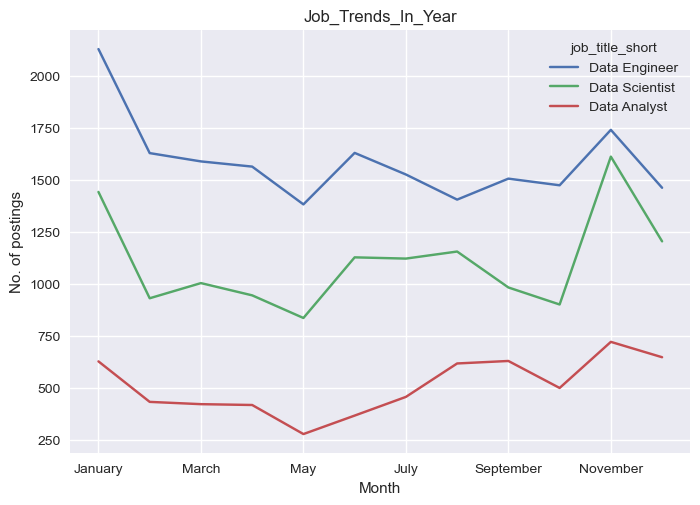

In [799]:
ind_job_pivot.plot(kind="line")
plt.xlabel('Month')
plt.ylabel('No. of postings')
plt.title('Job_Trends_In_Year')

plt.show()

In [800]:
software_jobs=pd.read_csv(r"C:\Users\Chira\Downloads\software_jobs.csv")

In [801]:
merged_job=pd.merge(ind_job_pivot,software_jobs, left_on="posted_month", right_on="job_posted_month")

In [802]:
merged_job.set_index("job_posted_month", inplace=True)

In [803]:
top_jobs=merged_job.sum().sort_values(ascending=False).head(5).index.to_list()


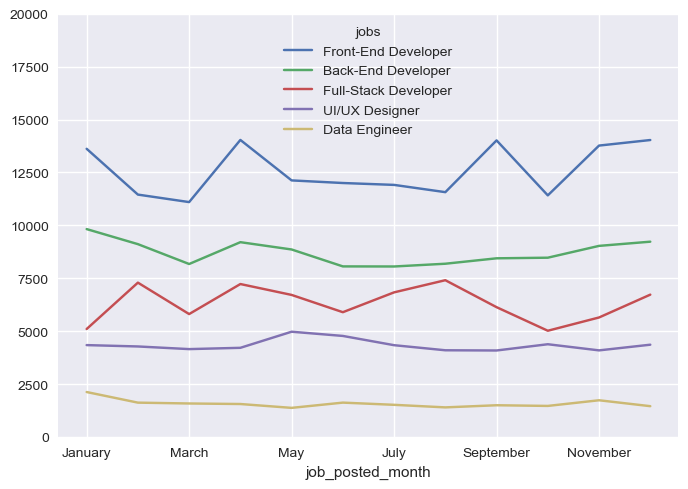

In [804]:
merged_job[top_jobs].plot(kind='line')
plt.ylim(0,20000)
plt.legend(title='jobs')
plt.show()


In [805]:
df_salary=df[pd.notna(df['salary_year_avg'])].copy()

In [806]:
def salary_inflation(salary):
    return(salary*1.03)


In [807]:
df_salary['inflated_salary']=df_salary['salary_year_avg'].apply(salary_inflation)

In [808]:
df_salary[['salary_year_avg', 'inflated_salary']]

,salary_year_avg,inflated_salary
job_index,,
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25


In [809]:
df_salary

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,inflated_salary
job_index,,,,,,,,,,,,,,,,,,
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"[gdpr, excel]","{'analyst_tools': ['excel'], 'libraries': ['gd...",112785.00
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"[mongodb, mongodb, python, r, sql, mysql, mari...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",144200.00
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}",123600.00
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr...",235068.66
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",91670.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",143392.48
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,154500.00
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':...",228531.25


In [810]:
type(df['job_skills'][0])

NoneType

In [811]:
df_salary['salary_year_inflated']=df_salary.apply(lambda row: 1.05*row['salary_year_avg'] if "senior" in row['job_title_short'] else 1.03*row['salary_year_avg'],axis=1)
df_salary[['job_title_short','salary_year_avg', 'salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
job_index,,,
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25


In [812]:
df_salary.explode('job_skills').value_counts('job_skills')

job_skills
sql        12951
python     12869
r           5088
aws         4949
tableau     4814
           ...  
pascal         1
mlr            1
lua            1
fastify        1
kali           1
Name: count, Length: 219, dtype: int64

In [813]:
df_exploded= df.explode('job_skills')

In [814]:
skill_count=df_exploded.groupby(['job_title_short','job_skills']).size()

In [815]:
skill_count=skill_count.reset_index(name='skill_count').sort_values(by='skill_count',ascending=False)
skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


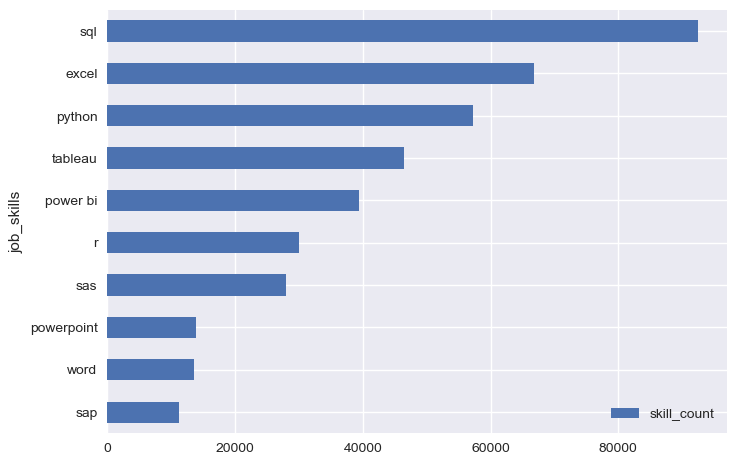

In [816]:
job_title="Data Analyst"
top_skills=10
skill_count_final=skill_count[skill_count['job_title_short']==job_title].head(top_skills)
skill_count_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()

In [817]:
job_skill='Data Analyst'       
df_job=df[df['job_title_short']==job_skill].copy()

In [818]:
df_job['month_no']=df['job_posted_date'].dt.month

In [819]:
df_job_exploded=df_job.explode('job_skills')

In [820]:
df_exploded_pivot=df_job_exploded.pivot_table(index='month_no', columns='job_skills',aggfunc='size',fill_value=0)
df_exploded_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [821]:
df_exploded_pivot.loc['total_count']=df_exploded_pivot.sum()
df_exploded_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [822]:
df_exploded_pivot=df_exploded_pivot[df_exploded_pivot.loc['total_count'].sort_values(ascending=False).index]

In [823]:
df_exploded_pivot=df_exploded_pivot.drop('total_count')

In [824]:
df_exploded_pivot=df_exploded_pivot.set_index('month_no')

KeyError: "None of ['month_no'] are in the columns"

<Axes: xlabel='month_no'>

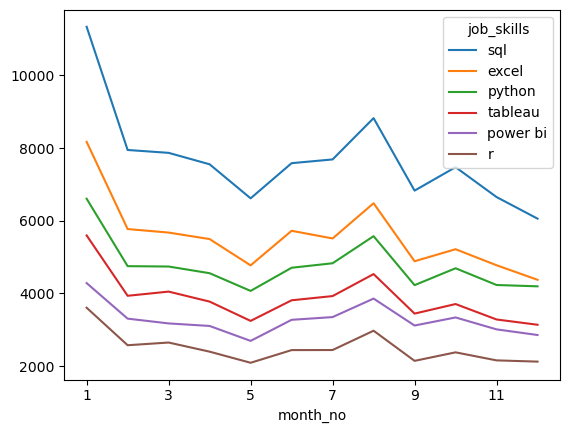

In [ ]:
df_exploded_pivot.iloc[:, :6].plot(kind='line')

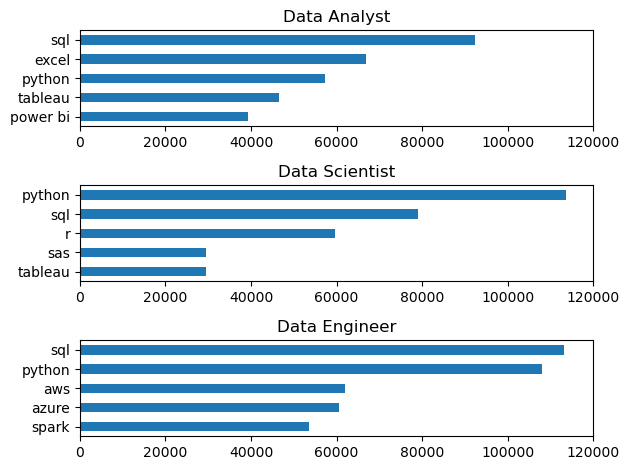

In [ ]:
skills=['Data Analyst', 'Data Scientist', 'Data Engineer']

fig,ax = plt.subplots(3,1)

for i, job_title in enumerate(skills):
    skills_plot=skill_count[skill_count['job_title_short']==job_title].head(5)
    skills_plot.plot(kind='barh',x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)
    ax[i].set_ylabel('')
fig.tight_layout()    
    

In [ ]:
df['job_no_degree_mention'].value_counts().plot(kind='pie',startangle=90, autopct="%1.1f%%")
plt.show()

KeyError: 'job_no_degree_mention'